## Exploratory Data Analysis

### Extract and load the dataset

In [28]:
import os
import sys

# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Import the load_data function from your custom module
from data_processing import load_data 


# Define paths
zip_file_path = '../Data/raw_analyst_ratings.csv.zip'  # Path to the .zip file
extracted_folder_path = '../Data'  # Path where the files will be extracted

In [29]:
# Load the dataset to the dataframe
df = load_data(zip_file_path, 'raw_analyst_ratings.csv')

In [30]:
# explore the the first 5 rows
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


In [31]:
# Check the size of the dataset
df.shape

(1407328, 5)

In [32]:
# checking missing values
df.isnull().sum()

headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

In [33]:
# check the data types
df.dtypes

headline                  object
url                       object
publisher                 object
date         datetime64[ns, UTC]
stock                     object
dtype: object

In [34]:
# check the uniqueness of the data
# Duplicate rows
print("\nDuplicate rows:")
df[df.duplicated()].reset_index()


Duplicate rows:


,index,headline,url,publisher,date,stock
0,562357,"Top Performing Industries For July 1, 2015",https://www.benzinga.com/news/15/07/5642290/to...,Lisa Levin,2015-07-01 00:00:00+00:00,GME


In [35]:
# drop duplicated rows
df.drop_duplicates().reset_index(inplace=True)

## Descriptive Statistics

In [36]:
# import eda
import descriptive_analysis as da

# Descriptive statistics
print("Headline Length Statistics:")
print(da.headline_length_stats(df))

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


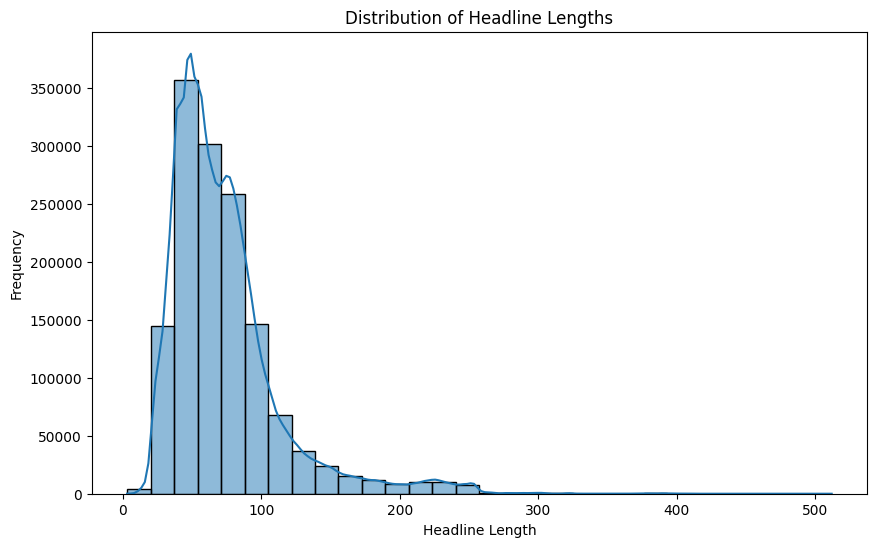

In [10]:
# Plot the distribution of headline lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

Summary of the Distribution Plot:

According to the descriptive statistics and distribution plot above, we can conclude that the distribution is heavily skewed to the right. This indicates that most headlines are relatively short, while a smaller number of headlines are significantly longer.

The peak of the distribution is around 50-70 characters, indicating that this is the most common headline length.

In summary, the distribution of headline lengths is right-skewed with a peak around 50-70 characters and a long tail extending towards longer headlines. Most headlines are relatively short, but a few are significantly longer.

### Count the most active publishers

In [11]:
print("Top Publishers:")
publisher_counts = da.articles_per_publisher(df).reset_index(name="no_of_articles")
top_publisher = publisher_counts.head(10)
top_publisher

Top Publishers:


,publisher,no_of_articles
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
5,Eddie Staley,57254
6,Hal Lindon,49047
7,ETF Professor,28489
8,Juan Lopez,28438
9,Benzinga Staff,28114


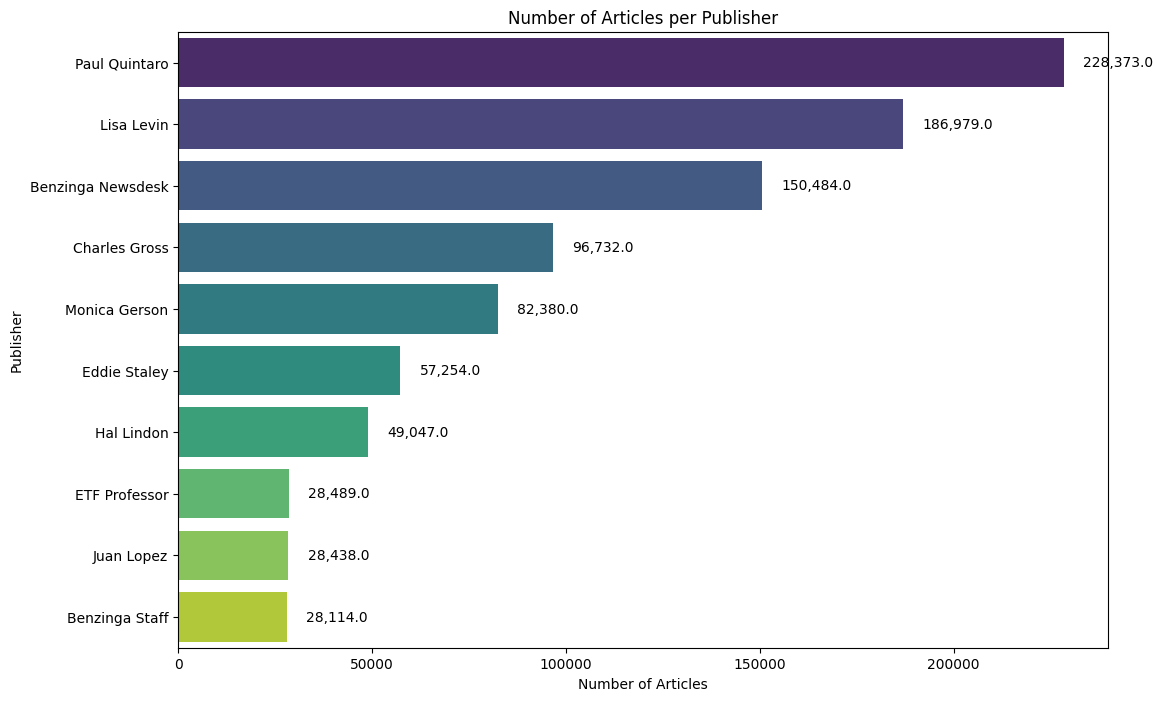

In [12]:
import matplotlib.pyplot as plt

# Plot the number of articles per publisher
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
bars = sns.barplot(x='no_of_articles', y='publisher', 
                   data=top_publisher, 
                   palette='viridis',
                   hue='publisher',
                   ax=ax)

# Add exact numbers at the end of each bar
for bar in bars.patches:
    width = bar.get_width()
    label = f'{width:,}'
    ax.text(width + 5000, bar.get_y() + bar.get_height() / 2, label,
            ha='left', va='center', color='black', fontsize=10)

plt.title('Number of Articles per Publisher')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()


Summary of Most Active Publishers
- Paul Quintaro is the most active publisher with 228,373 articles.
- Lisa Levin follows with 186,978 articles.
- Benzinga Newsdesk has 150,484 articles, making it the third most active.
- Charles Gross and Monica Gerson are also highly active, with 96,732 and 82,380 articles, respectively.
- Eddie Staley, Hal Lindon, ETF Professor, Juan Lopez, and Benzinga Staff are notable contributors, each publishing between 28,114 and 57,254 articles.

### Articles by day of weeks

In [13]:
# Articles by day of weeks
articles_by_day = da.articles_by_day_of_week(df).reset_index(name='no_of_articles')
articles_by_day

,day_of_week,no_of_articles
0,Thursday,302619
1,Wednesday,300922
2,Tuesday,296505
3,Monday,265139
4,Friday,217918
5,Sunday,16466
6,Saturday,7759


The above analysis shows that Thursday is the peak day for publishing articles with 12,688 entries, followed closely by Wednesday and Tuesday with 11,891 and 11,002 articles, respectively. Activity drops significantly on weekends, with Sunday and Saturday seeing only 436 and 267 articles, indicating a clear mid-week publishing trend.

### Analyze and identify unique emails
- If email addresses are used as publisher names, identify unique domains to see if certain organizations contribute more frequently.




In [14]:
# identify unique emails
unique_domains = da.identify_unique_domains(df)
unique_domains.reset_index(drop=True)


,domain,count
0,benzinga.com,7937
1,gmail.com,139
2,andyswan.com,5
3,investdiva.com,2
4,tothetick.com,2
5,eosdetroit.io,1
6,forextraininggroup.com,1
7,stockmetrix.net,1


The domain benzinga.com is the most prominent, contributing a significant majority of the articles (7,937). This suggests that Benzinga is a major source of news in stock news.

gmail.com appears relatively frequently with 139 occurrences. This likely represents individual contributors or less formal sources.

## Text Analysis(Sentiment analysis & Topic Modeling)

In [50]:
# Import the module
from sentiment_analysis import SentimentAnalyzer as sa

# Perform sentiment analysis on headline
sentiment_df = sa.analyze_sentiment(df['headline'])

# Apply sentiment categories (Positive, Neutral, Negative)
sentiment_df = sa.apply_sentiment_categories(sentiment_df)

In [51]:
# make the date as index and add stock column at the end
sentiment_df['Date'] = df['date'].dt.date
sentiment_df['stock'] = df['stock']
sentiment_df.set_index('Date', inplace=True)

In [52]:
# Display results
sentiment_df.head()

,headline,neg,neu,pos,compound,Sentiment,stock
Date,,,,,,,
2020-06-05,Stocks That Hit 52-Week Highs On Friday,0.0,1.000,0.000,0.000,Neutral,A
2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,0.0,1.000,0.000,0.000,Neutral,A
2020-05-26,71 Biggest Movers From Friday,0.0,1.000,0.000,0.000,Neutral,A
2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,0.0,1.000,0.000,0.000,Neutral,A
2020-05-22,B of A Securities Maintains Neutral on Agilent...,0.0,0.833,0.167,0.296,Positive,A


In [53]:
empty_headlines = sentiment_df[sentiment_df['headline'] == '']
print(f"Number of empty headlines: {len(empty_headlines)}")

Number of empty headlines: 0


In [54]:
missing_after_sentiment = sentiment_df[sentiment_df['headline'].isna()]
print(f"Number of missing headlines after sentiment analysis: {len(missing_after_sentiment)}")


Number of missing headlines after sentiment analysis: 6509


In [55]:
# Find rows with NaN in cleaned_headline
# Check the data types in the 'headline' column
print(sentiment_df['headline'].apply(type).value_counts())


headline
<class 'str'>      1407328
<class 'float'>       6509
Name: count, dtype: int64


In [56]:
# Drop rows where the 'headline' column has float values
sentiment_df = sentiment_df[sentiment_df['headline'].apply(lambda x: not isinstance(x, float))]


In [57]:
# Save the sentiment analysis result into csv for correlation analysis
# with stock market movements
sentiment_df.to_csv('../Data/sentiment.csv')

Sentiment Distribution of Headlines

Sentiment
Neutral     744222
Positive    439803
Negative    223303
Name: count, dtype: int64


/tmp/ipykernel_100977/1781788973.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage_text = f'{percentages[i]:.1f}%'


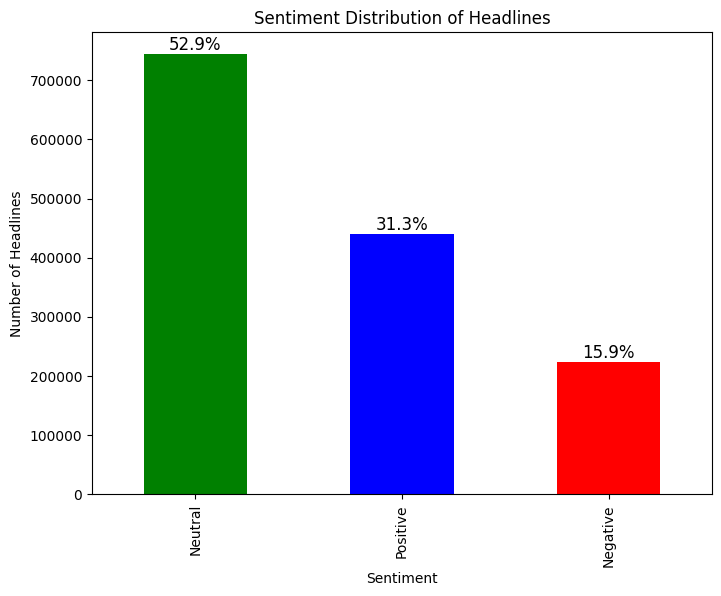

In [29]:
# Summary of sentiment distribution
sentiment_distribution = sentiment_df['Sentiment'].value_counts()
print(sentiment_distribution)

total = sentiment_distribution.sum()  # Calculate the total number of headlines
percentages = (sentiment_distribution / total) * 100  # Calculate percentages

# Optional: Plot the sentiment distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
bars = sentiment_distribution.plot(kind='bar', color=['green', 'blue', 'red'])

# Add percentage annotations on top of each bar
for i, bar in enumerate(bars.patches):
    # Get the height of the bar
    height = bar.get_height()
    # Calculate the percentage and format it
    percentage_text = f'{percentages[i]:.1f}%'
    # Position the text at the end of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, percentage_text, 
             ha='center', va='bottom', fontsize=12)

# Set titles and labels
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')

# Display the plot
plt.show()



The majority of the headlines (52.7%) are neutral in tone, indicating that much of the financial news is factual or balanced without a strong positive or negative bias. A significant portion (31.4%) of the headlines convey a positive sentiment, suggesting that there is a relatively optimistic outlook in the news. Meanwhile, a smaller percentage (15.9%) of the headlines are negative, reflecting less frequent instances of pessimism or unfavorable news.

Overall, the sentiment distribution shows that financial news tends to be more neutral or positive, with fewer headlines expressing negativity. This could be indicative of the media's focus on positive financial developments or the general market conditions during the analyzed period.

## Identify common keywords or phrases

Here are the steps to identify common kewords or phrases

Text Preprocessing:

- Clean and prepare the text data by removing stopwords, punctuation, and other noise.

Tokenization:

- Break down the text into individual words or phrases.

Frequency Analysis:

- Calculate the frequency of each word or phrase to identify the most common ones.

Topic Modeling (Optional):

- Use algorithms like Latent Dirichlet Allocation (LDA) to identify underlying topics in the headlines.

In [30]:
sentiment_df.head()

,headline,neg,neu,pos,compound,Sentiment
0,Stocks That Hit 52-Week Highs On Friday,0.0,1.000,0.000,0.000,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,0.0,1.000,0.000,0.000,Neutral
2,71 Biggest Movers From Friday,0.0,1.000,0.000,0.000,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,0.0,1.000,0.000,0.000,Neutral
4,B of A Securities Maintains Neutral on Agilent...,0.0,0.833,0.167,0.296,Positive


In [31]:
sentiment_df.dtypes

headline      object
neg          float64
neu          float64
pos          float64
compound     float64
Sentiment     object
dtype: object

In [32]:
sentiment_df.isnull().sum()

headline        0
neg          6509
neu          6509
pos          6509
compound     6509
Sentiment       0
dtype: int64

Most common keywords:
vs: 162147
stocks: 161868
q: 157878
est: 140606
eps: 128929
shares: 114209
reports: 108707
update: 91680
market: 90880
earnings: 87185
sales: 79526
top: 78678
pt: 73054
week: 67669
announces: 66529
price: 64232
buy: 64060
downgrades: 61942
trading: 61158
benzingas: 57985


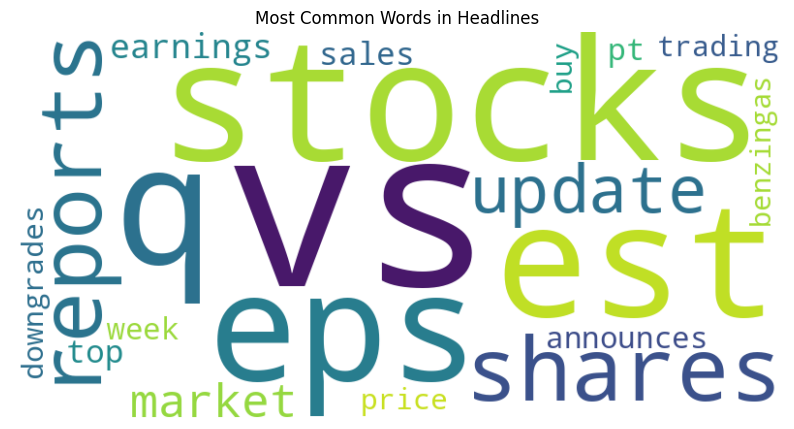

In [33]:
# Analyze the most common keywords
sa.perform_nlp_analysis(sentiment_df['headline'])

Based on the most common keywords extracted from the headlines indicate a strong focus on stock performance, earnings reports, and market updates. Terms like "stocks," "EPS," "shares," and "earnings" are frequently mentioned, reflecting the dataset's emphasis on key financial metrics and company performance. Additionally, the prevalence of "reports," "update," and "market" highlights the importance of timely news and market conditions in financial reporting.

### Topic Modeling (Advanced - Optional)
Topic Modeling: For deeper analysis, LDA helps discover hidden topics, such as common themes like "FDA approval" or "price target", which can be crucial for understanding market trends.

We can use Latent Dirichlet Allocation (LDA) from the gensim library:

In [35]:
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
# Create a dictionary representation of the documents
dictionary = corpora.Dictionary([word_tokenize(headline) for headline in sentiment_df['headline']])

# Convert to Bag-of-Words corpus
corpus = [dictionary.doc2bow(word_tokenize(headline)) for headline in sentiment_df['headline']]

# Train LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Print the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


## Time Series Analysis

### Analzye annual or quartley trends 

/home/noh/10Academy/aim10academy-week1-challenge/scripts/publication_analysis.py:19: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  annual_counts = data.groupby(data['date'].dt.to_period('Y')).size().reset_index(name='no_of_articles')
/home/noh/10Academy/aim10academy-week1-challenge/scripts/publication_analysis.py:35: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  quarterly_counts = data.groupby(data['date'].dt.to_period('Q')).size().reset_index(name='no_of_articles')


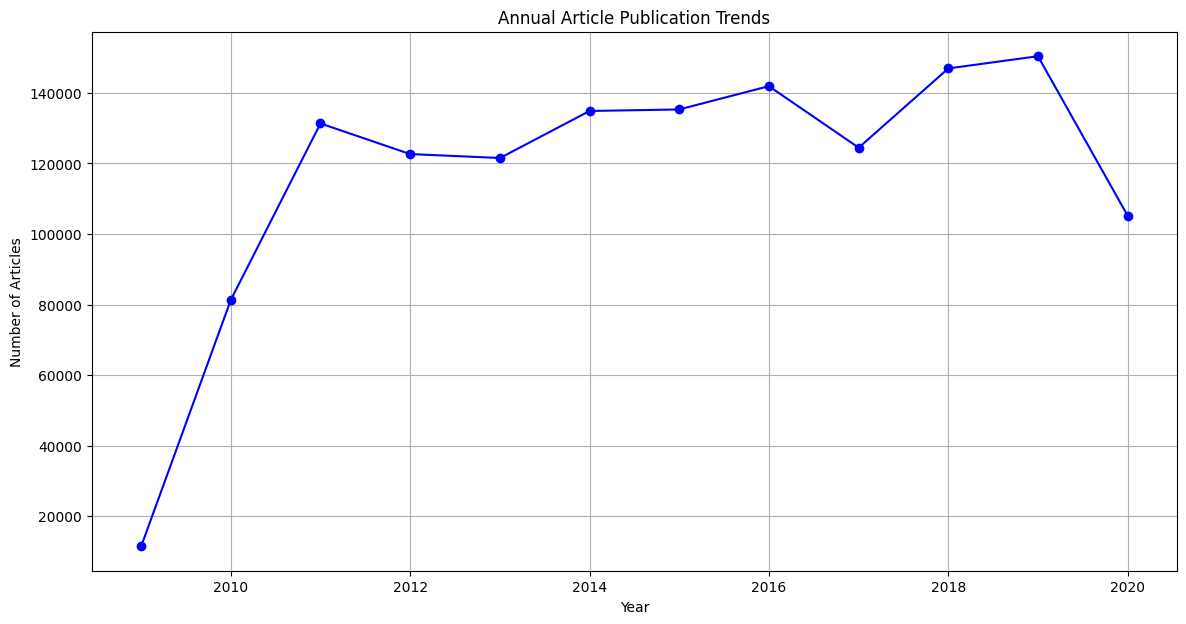

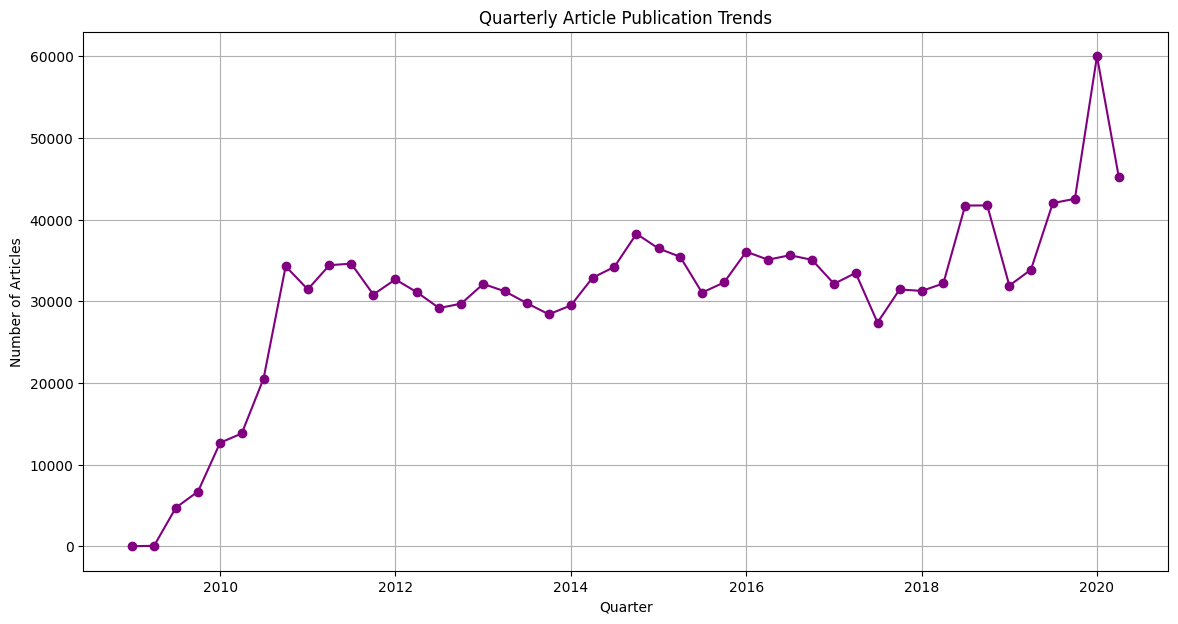

In [20]:
# Analyze annual and quarterly trends
from publication_analysis import *

annual_counts = analyze_annual_trends(df)
quarterly_counts = analyze_quarterly_trends(df)

# Plot the long-term trends
plot_long_term_trends(annual_counts, quarterly_counts)


The graph shows that the annual trend in article publications from 2010 to 2020. There is a notable increase in the number of articles published over this decade, particularly between 2010 and 2012, where the publication frequency surged. However, a slight decline is observed in the later years, specifically in 2019 and 2020, indicating a possible slowdown in article production during this period.

### Decomposition 

In [28]:
# Decompose the time series to understand trends and seasonality
import statsmodels.api as sm

decomposed = sm.tsa.seasonal_decompose(annual_counts['no_of_articles'], model='additive', period=6)


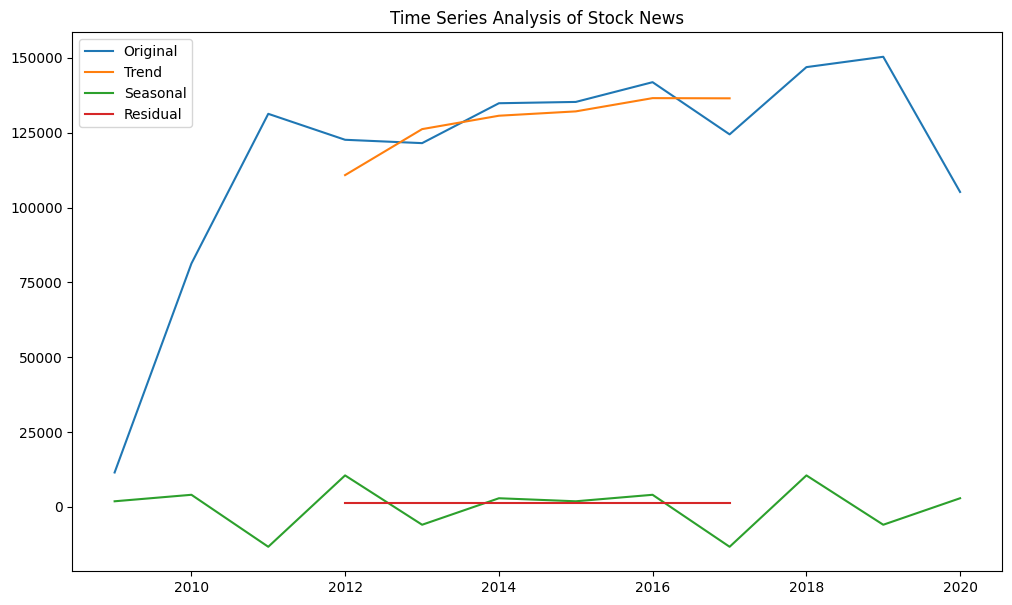

In [36]:
plt.figure(figsize=(12, 7))
# plot the original data
plt.plot(annual_counts['date'], annual_counts['no_of_articles'], label='Original')
# plot the trend
plt.plot(annual_counts['date'], decomposed.trend, label='Trend')
# plot the seasonal
plt.plot(annual_counts['date'], decomposed.seasonal, label='Seasonal')
# plot residual
plt.plot(annual_counts['date'], decomposed.resid, label='Residual')
plt.title('Time Series Analysis of Stock News')
plt.legend()
plt.show()

According to the decomposition of the above plot here's the summary:

Trend: The trend component shows a consistent upward trajectory, indicating a steady increase in the volume or impact of stock news over time. This suggests that the frequency or importance of stock news has generally grown over time.

Seasonality: The seasonal component is relatively  flat, suggesting no significant recurring patterns, meaning stock news is not strongly influenced by predictable seasonal factors.

Residual: The residual component, with variations close to zero, indicates that the remaining fluctuations are largely random and unpredictable.


In general, the time series decomposition of stock news suggests that the observed increase in news volume or impact is primarily driven by a long-term upward trend. There is no strong evidence of seasonal patterns affecting the data, and the residual variations are likely due to random noise or other factors not captured by the trend and seasonal components. This analysis highlights the growing significance of stock news over time, without clear seasonal influences.

### Save the sentiment data to the csv for correlation analysis with stock movement

In [ ]:
sent